 **Resampling Datetime Data (Core)**

# Task

For this assignment, you will be working with a [modified version of weather data from London from Kaggle](https://www.kaggle.com/datasets/emmanuelfwerr/london-weather-data).

The assignment is split into 2 parts:

* Part 1: Load the data and create a datetime index

* Part 2: Answer 2 Questions using visualizations and the correct frequency data

**Part 1) Load the data and make a datetime index.**

* Use the modified version of the data provided here:
    * Share URL:
        * [https://docs.google.com/spreadsheets/d/1J2hEGA1-ZOdXOc1Go2AjB7xShq-nAvIDpBz_XRZscHU/edit?usp=sharing](https://docs.google.com/spreadsheets/d/1J2hEGA1-ZOdXOc1Go2AjB7xShq-nAvIDpBz_XRZscHU/edit?usp=sharing)
    * Raw URL:
        * [https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv](https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv)

You must first load the data and create a datetime index.

1. Convert the date column to datetime dtype.
2. Set the date column as the index.
3. Filter out only the required data:
    * Keep only data from the year 2000 or later.
    * Keep only the following features:
        * precipitation
        * mean_temp
        * min_temp
        * max_temp
        * snow_depth
4. Impute any missing values.
    * Think about each feature and what imputation method makes sense. You may not be able to use the same method for every feature!

**Part 2) Answer the Questions with Visualizations (Using the Correct Frequency)**

* For each of the following questions, make a new copy of the dataframe resampled to the correct frequency for the question.
* Plot the feature that the question is asking about.
    * If there is a specific time period, plot only that time period.

Note: you may want to make a temporary DataFrame that you will use to answer this question only.

**Q1: What month had the most precipitation between 2000 through 2010?**

* Resample the precipitation column to a Monthly frequency using .sum() as the aggregation method
* Find the date and corresponding value for the max precipitation.
* Plot the feature and time period that corresponds to the question.
    * Make sure to meet the "Visualization Requirements" below!
* Determine the date and value for the most precipitation (the max precipitation).
* Add a vertical line at this date with a label that says the date (using date format: "April 2000") and the max precipitation value.
    * Make sure to add a legend so that your label is visible.

**Visualization Issue Workaround**
* NOTE: Pandas' .plot method currently has a bug with 4-digit year axis labels. The tick labels misbehave when being formatted with matplotlib and will produce a mostly-blank axis with 1 year labeled, like the screenshot below:

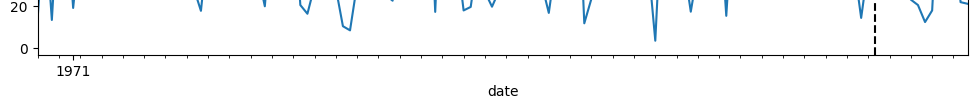

* To get around this issue, first, create your fig and ax using plt.subplots()

    * Now you may use pandas .plot method to plot this figure by adding the argument "ax=ax" to .plot().
        * fig, ax = plt.subplots(figsize=(12,3))
        * df.plot(ax=ax)

**Q1 Visualization Requirements**
* Use a combination of pandas, matplotlib tick formatters, tick locators, and the fig.autofmt_xdate method to:
    * Create a wide figure (e.g. figsize=(12,3))
        * With the title "Precipitation for 2000-2010"
        * With a ylabel of "Inches"
    * Customize the major xaxis ticks to:
        * Have major xaxis ticks every 1 year.
        * Use 4-digit years for the labels
        * Rotate the major ticks' labels 90 degrees.
    * Customize the minor xaxis ticks to:
        * Have minor xaxis ticks every 3 months
        * Do not label the minor ticks.

**Q2: Which year between 2000-2020 had the coolest average temperature?**

* Resample the  mean_temp data to a Yearly frequency using .mean() as the aggregation method.
* Plot the feature and time period that corresponds to the question.
    * Make sure to meet the "Visualization Requirements" below!
* Determine the year and value for the lowest mean temp.
* Add a vertical line at this date with a label that says the date (using date format: "2000") and the lowest mean temperature value.

**Q2 Visualization Requirements**
* Use a combination of pandas, matplotlib tick formatters, tick locators, and the fig.autofmt_xdate method to:
    * Create a wide figure (e.g. figsize=(12,3))
        * With the title "Average Temperature"
        * With a ylabel of "Degrees"
    * Customize the major xaxis ticks to:
        * Have major xaxis ticks every 5 years.
        * Use 4-digit years for the labels
        * Rotate the major ticks' labels 90 degrees.
    * Customize the minor xaxis ticks to:
        * Have minor xaxis ticks every 1 year
        * Do not label the minor ticks.

# Solution

**Part 1) Load the data and make a datetime index.**

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# You must first load the data
url ="https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv"
df = pd.read_csv(url)
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,20201230,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


In [2]:
# Convert the date column to datetime dtype.
# Double check if the results are correct and as expected --in the appropriate format! Correct if not.
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['date']

0       1979-01-01
1       1979-01-02
2       1979-01-03
3       1979-01-04
4       1979-01-05
           ...    
15336   2020-12-27
15337   2020-12-28
15338   2020-12-29
15339   2020-12-30
15340   2020-12-31
Name: date, Length: 15341, dtype: datetime64[ns]

In [3]:
# Create a datetime index
df = df.set_index('date')
df

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...
2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN


In [4]:
# Filter out only the required data:
# Keep only data from the year 2000 or later.
# Keep only the following features:
# precipitation
# mean_temp
# min_temp
# max_temp
# snow_depth
df = df.loc['2000':, ['precipitation', 'mean_temp', 'min_temp', 'max_temp', 'snow_depth']]
df

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0
...,...,...,...,...,...
2020-12-27,2.0,7.5,7.6,7.5,NaN
2020-12-28,0.2,1.1,-1.3,3.6,NaN
2020-12-29,0.0,2.6,1.1,4.1,NaN


In [5]:
# Impute any missing values.
# Think about each feature and what imputation method makes sense. You may not be able to use the same method for every feature!

# Check missing values
df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [6]:
# Interpolate temperature measures
df['mean_temp'] = df['mean_temp'].interpolate()
df['max_temp'] = df['max_temp'].interpolate()
df['min_temp'] = df['min_temp'].interpolate()

In [7]:
# Check null values again
df.isna().sum()

precipitation     390
mean_temp           0
min_temp            0
max_temp            0
snow_depth       1752
dtype: int64

In [8]:
# For precipitation and snow_depth, we can fill missing values with 0
df['precipitation'] = df['precipitation'].fillna(0)
df['snow_depth'] = df['snow_depth'].fillna(0)

In [9]:
# Check if the null values have been filled
df.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

In [10]:
# Import dates as mdates from matplotlib
from matplotlib import dates as mdates

**Part 2) Answer the Questions with Visualizations (Using the Correct Frequency)**

* For each of the following questions, make a new copy of the dataframe resampled to the correct frequency for the question.
* Plot the feature that the question is asking about.
* If there is a specific time period, plot only that time period.

**Q1: What month had the most precipitation between 2000 through 2010?**

* Resample the precipitation column to a Monthly frequency using .sum() as the aggregation method
* Find the date and corresponding value for the max precipitation.
* Plot the feature and time period that corresponds to the question.
* Make sure to meet the "Visualization Requirements" below!
    * Determine the date and value for the most precipitation (the max precipitation).
    * Add a vertical line at this date with a label that says the date (using date format: "April 2000") and the max precipitation value.
    * Make sure to add a legend so that your label is visible.

In [11]:
precip_cols = ['precipitation', 'snow_depth']
q1_df = df.loc['2000':'2010',precip_cols]
q1_df

,precipitation,snow_depth
date,,
2000-01-01,0.0,0.0
2000-01-02,0.2,0.0
2000-01-03,6.0,0.0
2000-01-04,0.2,0.0
2000-01-05,0.8,0.0
...,...,...
2010-12-27,5.0,1.0
2010-12-28,0.4,0.0
2010-12-29,1.4,0.0


In [12]:
q1_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4018 entries, 2000-01-01 to 2010-12-31
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  4018 non-null   float64
 1   snow_depth     4018 non-null   float64
dtypes: float64(2)
memory usage: 94.2 KB


In [13]:
ps = q1_df.copy()
ps.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2010-12-22', '2010-12-23', '2010-12-24', '2010-12-25',
               '2010-12-26', '2010-12-27', '2010-12-28', '2010-12-29',
               '2010-12-30', '2010-12-31'],
              dtype='datetime64[ns]', name='date', length=4018, freq=None)

In [14]:
temp_cols = ['mean_temp','min_temp','max_temp']

In [15]:
# Resample the precipitation column to a Monthly frequency using .sum() as the aggregation method
agg_dictionary = {'precipitation':'sum'}
ps_M = ps.resample("M").agg(agg_dictionary)
ps_M

,precipitation
date,
2000-01-31,14.3
2000-02-29,62.2
2000-03-31,13.4
2000-04-30,71.8
2000-05-31,68.4
...,...
2010-08-31,83.8
2010-09-30,38.0
2010-10-31,61.0


In [16]:
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

**Q1 Visualization Requirements**

* Use a combination of pandas, matplotlib tick formatters, tick locators, and the fig.autofmt_xdate method to:
* Create a wide figure (e.g. figsize=(12,3))
    * With the title "Precipitation for 2000-2010"
    * With a ylabel of "Inches"
* Customize the major xaxis ticks to:
    * Have major xaxis ticks every 1 year.
    * Use 4-digit years for the labels
    * Rotate the major ticks' labels 90 degrees.
* Customize the minor xaxis ticks to:
    * Have minor xaxis ticks every 3 months
    * Do not label the minor ticks.

* Make sure to meet the "Visualization Requirements" below!
    * Determine the date and value for the most precipitation (the max precipitation).
    * Add a vertical line at this date with a label that says the date (using date format: "April 2000") and the max precipitation value.
    * Make sure to add a legend so that your label is visible.

**Q1: What month had the most precipitation between 2000 through 2010?**

In [17]:
# Find the date and corresponding value for the max precipitation.
date_max_precip = ps_M['precipitation'].idxmax()
max_precip = ps_M['precipitation'].max()

print(f"The highest daily precipitation of {max_precip} inches occurred on {date_max_precip.strftime('%B, %Y')}.")

The highest daily precipitation of 138.4 inches occurred on November, 2009.


In [18]:
annotate_precip = print(f"{date_max_precip.strftime('%B, %Y')} at {max_precip} inches")

November, 2009 at 138.4 inches


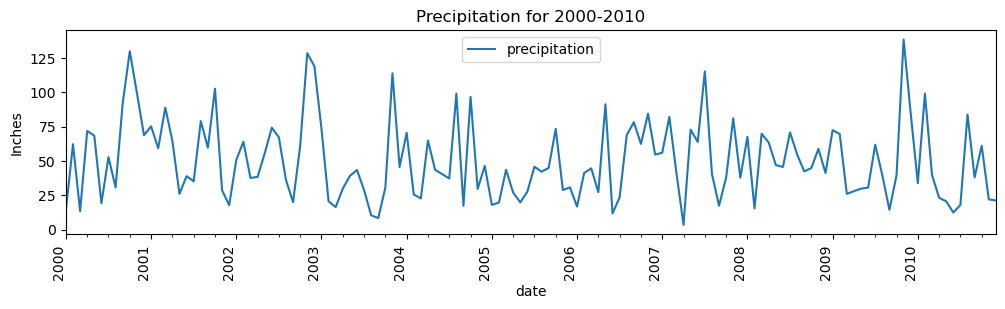

In [19]:
ax = ps_M.plot(figsize=(12,3))
ax.set(title='Precipitation for 2000-2010', ylabel='Inches')

# Customize major ticks
major_loc = mdates.YearLocator(1)
major_fmt = mdates.DateFormatter("%Y")

# Edit final xdates
fig = ax.get_figure()
fig.autofmt_xdate(which='major', rotation=90);

Q1: What month had the most precipitation between 2000 through 2010? It was November, 2009 at 138.4 inches of precipitation.

**Q2: Which year between 2000-2020 had the coolest average temperature?**

* Resample the  mean_temp data to a Yearly frequency using .mean() as the aggregation method.
* Plot the feature and time period that corresponds to the question.
    * Make sure to meet the "Visualization Requirements" below!
* Determine the year and value for the lowest mean temp.
* Add a vertical line at this date with a label that says the date (using date format: "2000") and the lowest mean temperature value.

**Q2 Visualization Requirements**
* Use a combination of pandas, matplotlib tick formatters, tick locators, and the fig.autofmt_xdate method to:
    * Create a wide figure (e.g. figsize=(12,3))
        * With the title "Average Temperature"
        * With a ylabel of "Degrees"
    * Customize the major xaxis ticks to:
        * Have major xaxis ticks every 5 years.
        * Use 4-digit years for the labels
        * Rotate the major ticks' labels 90 degrees.
    * Customize the minor xaxis ticks to:
        * Have minor xaxis ticks every 1 year
        * Do not label the minor ticks.

In [20]:
temp_cols = ['mean_temp','min_temp','max_temp']
q2_df = df.loc['2000':'2020',temp_cols]
q2_df

,mean_temp,min_temp,max_temp
date,,,
2000-01-01,7.0,4.9,10.8
2000-01-02,7.9,5.0,11.5
2000-01-03,9.4,7.2,9.5
2000-01-04,7.0,4.4,11.0
2000-01-05,6.4,1.9,10.8
...,...,...,...
2020-12-27,7.5,7.6,7.5
2020-12-28,1.1,-1.3,3.6
2020-12-29,2.6,1.1,4.1


In [21]:
ts = q2_df.copy()
ts.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=7671, freq=None)

In [22]:
# Resample the  mean_temp data to a Yearly frequency using .mean() as the aggregation method.
agg_dictionary = {'mean_temp':'mean'}
ts_Y = ts.resample("Y").agg(agg_dictionary)
ts_Y

,mean_temp
date,
2000-12-31,11.575683
2001-12-31,11.331507
2002-12-31,12.084247
2003-12-31,12.114521
2004-12-31,11.900683
2005-12-31,11.822877
2006-12-31,12.290822
2007-12-31,11.944384
2008-12-31,11.326776


In [23]:
# Determine the year and value for the lowest mean temp.
date_lowest_meantemp = ts_Y['mean_temp'].idxmin()
lowest_meantemp = ts_Y['mean_temp'].min()

print(f"The lowest temperature of {lowest_meantemp} degrees occurred on {date_lowest_meantemp.strftime('%Y')}.")

The lowest temperature of 10.657397260273973 degrees occurred on 2010.


**Q2 Visualization Requirements**
* Use a combination of pandas, matplotlib tick formatters, tick locators, and the fig.autofmt_xdate method to:
    * Create a wide figure (e.g. figsize=(12,3))
        * With the title "Average Temperature"
        * With a ylabel of "Degrees"
    * Customize the major xaxis ticks to:
        * Have major xaxis ticks every 5 years.
        * Use 4-digit years for the labels
        * Rotate the major ticks' labels 90 degrees.
    * Customize the minor xaxis ticks to:
        * Have minor xaxis ticks every 1 year
        * Do not label the minor ticks.

In [24]:
annotate_meantemp = print(f"{date_lowest_meantemp.strftime('%Y')} at {lowest_meantemp} degrees")

2010 at 10.657397260273973 degrees


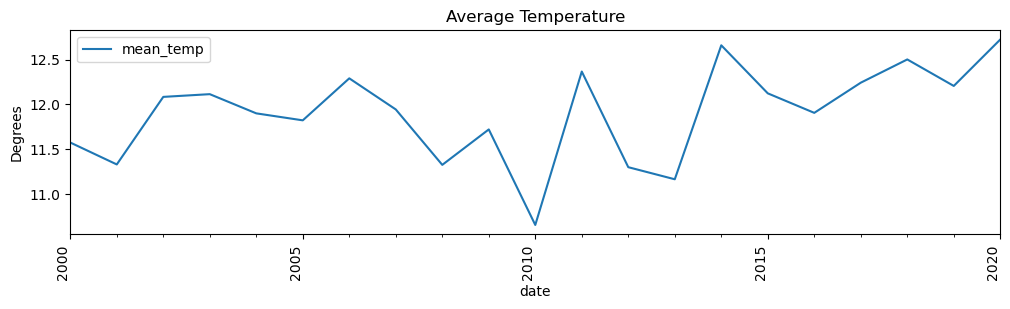

In [34]:
# Plot the data
ax = ts_Y.plot(figsize=(12,3))
ax.set(title='Average Temperature', ylabel='Degrees')

# Customize major ticks
major_loc = mdates.YearLocator(5)
major_fmt = mdates.DateFormatter("%Y")

# Edit final xdates
fig = ax.get_figure()
fig.autofmt_xdate(which='major', rotation=90);

Q2: Which year between 2000-2020 had the coolest average temperature? It was year 2010 at 10.657397260273973 degrees coolest average temperature.